# get dataset from web

In [156]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [172]:
def make_urllist(page_num, code, date): 
    urllist= []
    for i in range(1, page_num + 1):
        url = 'https://news.naver.com/main/list.nhn?mode=LSD&mid=sec&sid1='+str(code)+'&date='+str(date)+'&page='+str(i)   
        news = requests.get(url)

        soup = BeautifulSoup(news.content, 'html.parser')

        news_list = soup.select('.newsflash_body .type06_headline li dl')
        news_list.extend(soup.select('.newsflash_body .type06 li dl'))

        for line in news_list:
            urllist.append(line.a.get('href'))
    return urllist

In [173]:
idx2word = {'101' : '경제', '102' : '사회', '103' : '생활/문화', '105' : 'IT/과학'}

In [174]:
from newspaper import Article

def make_data(urllist, code):

    
    text_list = []
    for url in urllist:
        article = Article(url, language='ko')
        article.download()
        article.parse()
        text_list.append(article.text)

    df = pd.DataFrame({'news': text_list})

    df['code'] = idx2word[str(code)]
    
    return df

In [179]:
from tqdm import tqdm
def make_total_data(page_num, code_list, date_list):
    df = None

    for date in tqdm(date_list):
        for code in tqdm(code_list):
            url_list = make_urllist(page_num, code, date)
            
            try:
                df_temp = make_data(url_list, code)

                print(str(date)+"일자 "+str(code)+'번 코드에 대한 데이터를 만들었습니다.')

                if df is not None:
                    df = pd.concat([df, df_temp])
                else:
                    df = df_temp
            except:
                continue
    return df

In [180]:
code_list = [102, 103, 104, 105]
date_list = [20200506, 20200305, 20200104]

df = make_total_data(10, code_list, date_list)

csv_path = os.getenv("HOME") + "/aiffel/E3_news_crawler/news_data.csv"
df.to_csv(csv_path, index=False)

if os.path.exists(csv_path):
    print('{} File Saved!'.format(csv_path))


 25%|██▌       | 1/4 [00:43<02:09, 43.32s/it]

20200506일자 102번 코드에 대한 데이터를 만들었습니다.



 50%|█████     | 2/4 [01:30<01:28, 44.47s/it]

20200506일자 103번 코드에 대한 데이터를 만들었습니다.



  0%|          | 0/4 [00:00<?, ?it/s]

20200506일자 105번 코드에 대한 데이터를 만들었습니다.



 25%|██▌       | 1/4 [00:51<02:34, 51.44s/it]

20200305일자 102번 코드에 대한 데이터를 만들었습니다.



 50%|█████     | 2/4 [01:42<01:42, 51.31s/it]

20200305일자 103번 코드에 대한 데이터를 만들었습니다.



  0%|          | 0/4 [00:00<?, ?it/s]

20200305일자 105번 코드에 대한 데이터를 만들었습니다.



 25%|██▌       | 1/4 [00:52<02:38, 52.88s/it]

20200104일자 102번 코드에 대한 데이터를 만들었습니다.



 50%|█████     | 2/4 [01:47<01:46, 53.28s/it]

20200104일자 103번 코드에 대한 데이터를 만들었습니다.



100%|██████████| 3/3 [10:00<00:00, 200.01s/it]

20200104일자 105번 코드에 대한 데이터를 만들었습니다.
/home/aiffel/aiffel/E3_news_crawler/news_data.csv File Saved!


# import dataset

In [181]:
import os
import pandas as pd

In [182]:
csv_path = os.getenv("HOME") + "/aiffel/E3_news_crawler/news_data.csv"
df = pd.read_table(csv_path, sep=',')
df.head()

,news,code
0,파주시청. 사진제공=파주시 파주시청. 사진제공=파주시\n\n[파주=파이낸셜뉴스 강근...,사회
1,동영상 뉴스\n\n이천 물류창고 화재 발화지점으로 지목된 지하 2층에서 산소절단기의...,사회
2,황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검. 사진...,사회
3,귀갓길 여성을 쫓아가 성범죄를 시도한 20대 남성이 구속됐습니다.서울 강남경찰서는 ...,사회
4,(서울=연합뉴스) 대한약사회가 6일부터 코로나바이러스 감염증 대응 체계를 '사회적 ...,사회


# data preprocessing

In [183]:
# 정규 표현식을 이용해서 한글 외의 문자는 전부 제거합니다.
df['news'] = df['news'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df['news']

0       파주시청 사진제공파주시 파주시청 사진제공파주시파주파이낸셜뉴스 강근주 기자 파주시는 ...
1       동영상 뉴스이천 물류창고 화재 발화지점으로 지목된 지하 층에서 산소절단기의 산소 공...
2       황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검 사진제...
3       귀갓길 여성을 쫓아가 성범죄를 시도한 대 남성이 구속됐습니다서울 강남경찰서는 강간상...
4       서울연합뉴스 대한약사회가 일부터 코로나바이러스 감염증 대응 체계를 사회적 거리두기에...
                              ...                        
1753    서울뉴시스 이재은 기자  한국인터넷기업협회인기협는 정보통신서비스 제공자에게 사적 검...
1754    리처드 플레플러 전   연합뉴스 자료사진 리처드 플레플러 전   연합뉴스 자료사진샌...
1755    한국의 인공지능 기술과 산업화 수준이 미국중국영국일본 등 경쟁국보다 뒤지는 것으로 ...
1756    서울뉴시스 오동현 기자  넥슨의 온라인 캐주얼 레이싱게임 크레이지레이싱 카트라이더에...
1757    서울뉴시스 이재은 기자  한국인터넷진흥원은 한국경영인증원으로부터 인권경영시스템 인증...
Name: news, Length: 1758, dtype: object

In [184]:
print(df.isnull().sum())

news    0
code    0
dtype: int64


In [185]:
df.drop_duplicates(subset=['news'], inplace=True)

print('중복 제거 후 뉴스 기사 수: ',len(df))

중복 제거 후 뉴스 기사 수:  1496


<AxesSubplot:>

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54876 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel/anaconda3/en

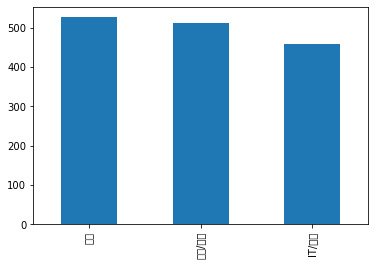

In [186]:
df['code'].value_counts().plot(kind = 'bar')

## 텍스트 전처리

In [194]:
from konlpy.tag import Hannanum
from konlpy.tag import Kkma
from konlpy.tag import Komoran
from konlpy.tag import Okt
from konlpy.tag import Mecab

In [195]:
def get_morphs(data):
    # parser = Kkma()
    # parser = Hannanum()
    # parser = Komoran
    # parser = Okt()
    parser = Mecab()
    return parser.morphs(data)

In [196]:
def get_nouns(data):
    parser = Mecab()
    return parser.nouns(data)

In [197]:
def remove_stopwords(data):
    stopwords = ['ㄴ', 'ㄹ', 'ㅂ', '으로', '를', '에','는',
                 '은','을','했','에게','있','이','의','하',
                 '한','다','과','때문','할','수','무단','따른',
                 '및','금지','전재','경향신문','기자','는데','가',
                 '등','들','파이낸셜','저작권자','저작','등','뉴스',
                '재배포', '머니투데이', '무단전재','연합뉴스','YTN','코리아중앙데일리','뉴스1',
                '한겨레','이데일리','아시아경제','파이낸셜뉴스','서울경제','동아일보','스포츠경향']
    return [word for word in data if not word in stopwords]

In [198]:
def preprocessing(dataset, _type="nouns"):
    result_list = []
    for data in dataset:
        if _type == "nouns":
            temp = remove_stopwords(get_nouns(data))
        elif _type == "morphs":
            temp = remove_stopwords(get_morphs(data))
        else:
            temp = []
        result_list.append(" ".join(temp))
    
    return result_list

In [199]:
# text_dataset_morphs = preprocessing(df['news'], "morphs")

In [200]:
text_dataset_nouns = preprocessing(df['news'], "nouns")

In [201]:
text_dataset_nouns[1]

'동영상 천 물류 창고 화재 발화 지점 지목 지하 층 산소 절단기 산소 공급 호스 채 발견 경찰 폭발 가능 수사 확보 현장 감식 사진 산소 절단기 연결 산소 공급 호스 절단 전문가 산소 공급 호스 기계 충격 절단 실제 산소 폭발 의견 제시 지하 층 밖 전동 절단기 그라인더 불꽃 발생 작업 도구 다수 경찰 집중 분석 경찰 건물 옆 우레탄 혼합 작업 현장 차량 발견 화재 당시 우레탄 폼 발포 작업 불꽃 화기 작업 동시 진행 조사 당신 제보 여러분 제보 카카오톡 검색 채널 추가 전화 온라인 제보 배포'

In [202]:
text_dataset = text_dataset_nouns

## split dataset

In [203]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_dataset, df['code'], random_state = 0)

In [204]:
print('훈련용 뉴스 기사의 개수 :', len(X_train))
print('테스트용 뉴스 기사의 개수 : ', len(X_test))
print('훈련용 레이블의 개수 : ', len(y_train))
print('테스트용 레이블의 개수 : ', len(y_test))

훈련용 뉴스 기사의 개수 : 1122
테스트용 뉴스 기사의 개수 :  374
훈련용 레이블의 개수 :  1122
테스트용 레이블의 개수 :  374


# Train

In [205]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

#- 단어의 수를 카운트하는 사이킷런의 카운트벡터라이저입니다.
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

#- 카운트벡터라이저의 결과로부터 TF-IDF 결과를 얻습니다.
tfidf_transformer = TfidfTransformer(smooth_idf = True, norm='l2')
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#- 나이브 베이즈 분류기를 수행합니다.
#- X_train은 TF-IDF 벡터, y_train은 레이블입니다.
clf = MultinomialNB().fit(X_train_tfidf, y_train)


# Test

In [206]:
def tfidf_vectorizer(data):
    data_counts = count_vect.transform(data)
    data_tfidf = tfidf_transformer.transform(data_counts)
    return data_tfidf

In [207]:
y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       IT/과학       0.79      0.88      0.84       113
          사회       0.83      0.82      0.83       136
       생활/문화       0.84      0.76      0.80       125

    accuracy                           0.82       374
   macro avg       0.82      0.82      0.82       374
weighted avg       0.82      0.82      0.82       374



y_pred = clf.predict(tfidf_vectorizer(X_test))

print(metrics.classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

          IT/과학       0.79      0.88      0.84       113
             사회       0.83      0.82      0.83       136
         생활/문화       0.84      0.76      0.80       125

        accuracy                           0.82       374
       macro avg       0.82      0.82      0.82       374
    weighted avg       0.82      0.82      0.82       374

